In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.models import Sequential

In [3]:
crypto = 'BTC'

In [4]:
against = 'INR'

In [5]:
start = dt.datetime(2016,1,1)
end = dt.datetime.now()

In [6]:
start

datetime.datetime(2016, 1, 1, 0, 0)

In [7]:
end

datetime.datetime(2022, 7, 18, 18, 56, 32, 632963)

In [8]:
data = web.DataReader(f'{crypto}-{against}','yahoo',start,end)

In [9]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,28659.066406,27719.962891,28300.330078,28503.232422,3044942722,28503.232422
2016-01-01,28864.216797,28273.705078,28513.429688,28763.769531,2402570153,28763.769531
2016-01-02,28878.207031,28600.589844,28782.841797,28704.431641,1993147335,28704.431641
2016-01-03,28724.630859,28096.636719,28713.703125,28467.287109,2623809084,28467.287109
2016-01-04,28897.769531,28404.460938,28470.597656,28842.994141,2562524545,28842.994141


# Prepare data :

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))

In [11]:
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [12]:
pred_days = 60

In [13]:
x_train, y_train = [],[]

In [14]:
for x in range(pred_days, len(scaled_data)):
    x_train.append(scaled_data[x-pred_days:x, 0])
    y_train.append(scaled_data[x, 0])

In [15]:
x_train, y_train = np.array(x_train),np.array(y_train)

In [16]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

# Create Neural Network :

In [17]:
model = Sequential()

In [18]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [19]:
model.compile(optimizer='adam',loss = 'mean_squared_error')

In [20]:
model.fit(x_train,y_train,epochs=25,batch_size=32)

Epoch 1/25
73/73 [==============================] - 10s 64ms/step - loss: 0.0094
Epoch 2/25
73/73 [==============================] - 5s 69ms/step - loss: 0.0028
Epoch 3/25
73/73 [==============================] - 5s 63ms/step - loss: 0.0029
Epoch 4/25
73/73 [==============================] - 5s 64ms/step - loss: 0.0025
Epoch 5/25
73/73 [==============================] - 5s 64ms/step - loss: 0.0024
Epoch 6/25
73/73 [==============================] - 5s 62ms/step - loss: 0.0022
Epoch 7/25
73/73 [==============================] - 5s 63ms/step - loss: 0.0019
Epoch 8/25
73/73 [==============================] - 5s 63ms/step - loss: 0.0021
Epoch 9/25
73/73 [==============================] - 5s 67ms/step - loss: 0.0019
Epoch 10/25
73/73 [==============================] - 5s 69ms/step - loss: 0.0018
Epoch 11/25
73/73 [==============================] - 5s 66ms/step - loss: 0.0018
Epoch 12/25
73/73 [==============================] - 5s 64ms/step - loss: 0.0015
Epoch 13/25
73/73 [=================

# Testing the model:

In [21]:
test_start = dt.datetime(2020,1,1)

In [22]:
test_end = dt.datetime.now()

In [23]:
test_data = web.DataReader(f'{crypto}-{against}','yahoo',test_start,test_end)

In [24]:
actual_price = test_data['Close'].values

In [25]:
total_dataset = pd.concat((data['Close'], test_data['Close']),axis=0)

In [26]:
model_inputs = total_dataset[len(total_dataset)- len(test_data)- pred_days:].values

In [27]:
model_inputs = model_inputs.reshape(-1,1)

In [28]:
model_inputs = scaler.fit_transform(model_inputs)

In [29]:
x_test = []

In [30]:
for x in range(pred_days, len(model_inputs)):
    x_test.append(model_inputs[x-pred_days:x, 0])

In [31]:
x_test=np.array(x_test)

In [32]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [33]:
prediction_price = model.predict(x_test)

In [34]:
prediction_price = scaler.inverse_transform(prediction_price)

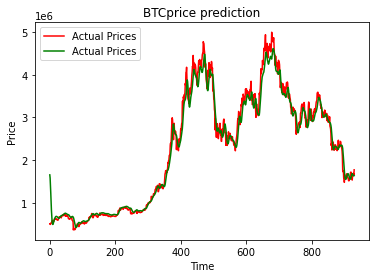

In [42]:
plt.plot(actual_price, color = 'red',label= 'Actual Prices')
plt.plot(prediction_price, color = 'green',label= 'Actual Prices')
plt.title(f'{crypto}price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

# Predict Next Day :

In [43]:
real_data = [model_inputs[len(model_inputs) + 1 -pred_days:len(model_inputs) + 1, 0]]

In [44]:
real_data = np.array(real_data)

In [45]:
real_data = np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))

In [46]:
prediction = model.predict(real_data)

In [47]:
prediction = scaler.inverse_transform(prediction)

In [48]:
print("Today's Price = ",prediction[-1],"INR")

Today's Price =  [1640281.1] INR
